# Is there a correlation between a player's height and their ranking?

C:\Users\Battousai\AppData\Local\Temp\ipykernel_11904\680452598.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)
C:\Users\Battousai\AppData\Local\Temp\ipykernel_11904\680452598.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)
C:\Users\Battousai\AppData\Local\Temp\ipykernel_11904\68045259

Correlation between height and ranking: 0.03


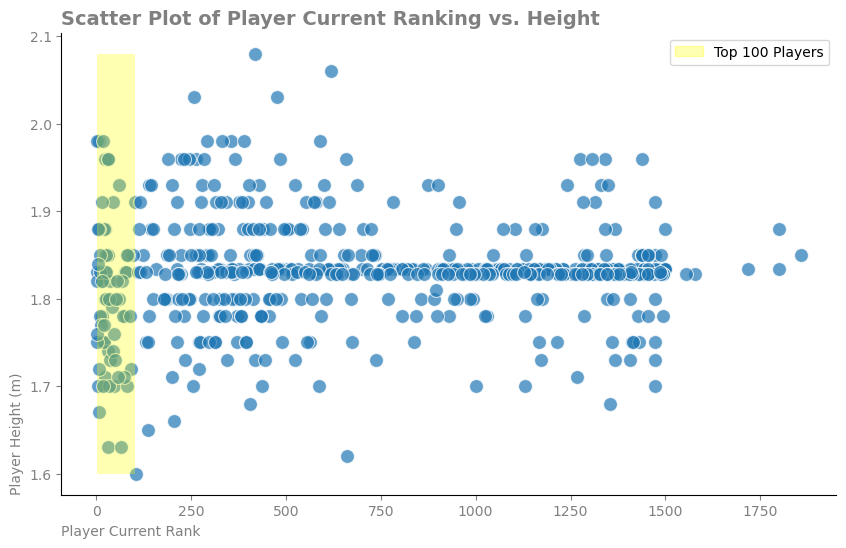

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)





# گام 1: جایگزینی مقادیر نال در ستون height با میانگین
# محاسبه میانگین قد برای تیم خانه و میهمان
mean_height_home = home_team_dataframe['height'].mean()
mean_height_away = away_team_dataframe['height'].mean()

# جایگزینی مقادیر نال با میانگین
home_team_dataframe['height'].fillna(mean_height_home, inplace=True)
away_team_dataframe['height'].fillna(mean_height_away, inplace=True)

# گام 2: استخراج اطلاعات بازیکنان از تیم‌های خانه و میهمان
home_players = home_team_dataframe[['player_id', 'height', 'current_rank']]
away_players = away_team_dataframe[['player_id', 'height', 'current_rank']]

# ادغام تیم‌های خانه و میهمان
all_players = pd.concat([home_players, away_players])

# حذف ردیف‌های نال در ستون current_rank
all_players = all_players.dropna(subset=['current_rank'])

# حذف ردیف‌های تکراری بر اساس player_id
all_players = all_players.drop_duplicates(subset='player_id')

# گام 3: محاسبه همبستگی پیرسون بین قد و رتبه
correlation = all_players['height'].corr(all_players['current_rank'])
print(f'Correlation between height and ranking: {correlation:.2f}')

# گام 4: رسم نمودار پراکندگی (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_players, x='current_rank', y='height', palette='blue', edgecolor='w', s=100, alpha = 0.7)
plt.title('Scatter Plot of Player Current Ranking vs. Height', fontsize=14, fontweight='bold', loc='left', color='gray')
plt.xlabel('Player Current Rank', loc='left', color = 'gray')
plt.ylabel('Player Height (m)', loc='bottom', color = 'gray')
#plt.gca().invert_xaxis()  # معکوس کردن محور x

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# اضافه کردن مستطیل فسفری برای 100 رتبه برتر
plt.gca().add_patch(patches.Rectangle((1, all_players['height'].min()), 100, all_players['height'].max() - all_players['height'].min(), 
                                       linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.3))
# اضافه کردن توضیحات به Legend
plt.legend(title='Top 100 Players', loc='upper right', fontsize='small', title_fontsize='medium')
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(patches.Rectangle((0,0), 1, 1, color='yellow', alpha=0.3))
labels.append('Top 100 Players')
plt.legend(handles=handles, labels=labels)

plt.show()

### Interpretation:

- **Weak Relationship**: A value of 0.03 indicates a very weak relationship between height and players' rankings. In fact, this number is close to zero, suggesting that changes in players' heights do not significantly impact their rankings.
- **Lack of Significant Relationship**: Since this number is near zero, we can conclude that there is no meaningful relationship between height and players' rankings. This means we cannot infer that taller players significantly outperform shorter players in terms of rankings.

**Conclusion**: Overall, while some taller players may have higher rankings or vice versa, this analysis indicates that there is no overarching relationship between height and ranking. A more in-depth investigation might be needed, considering other variables or conducting more thorough analyses.